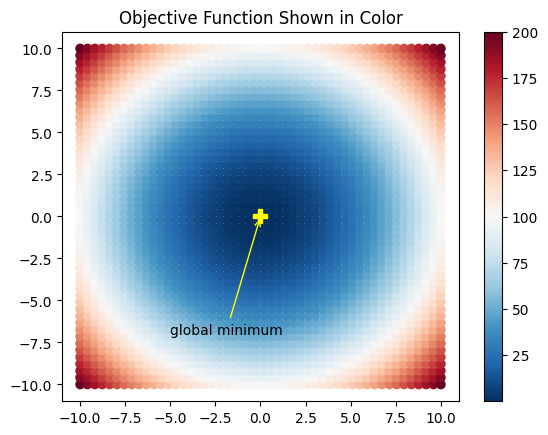

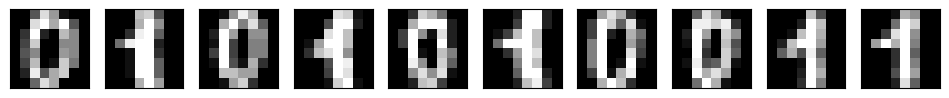

<ipython-input-1-38faf91179a5>:185: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,i+1)


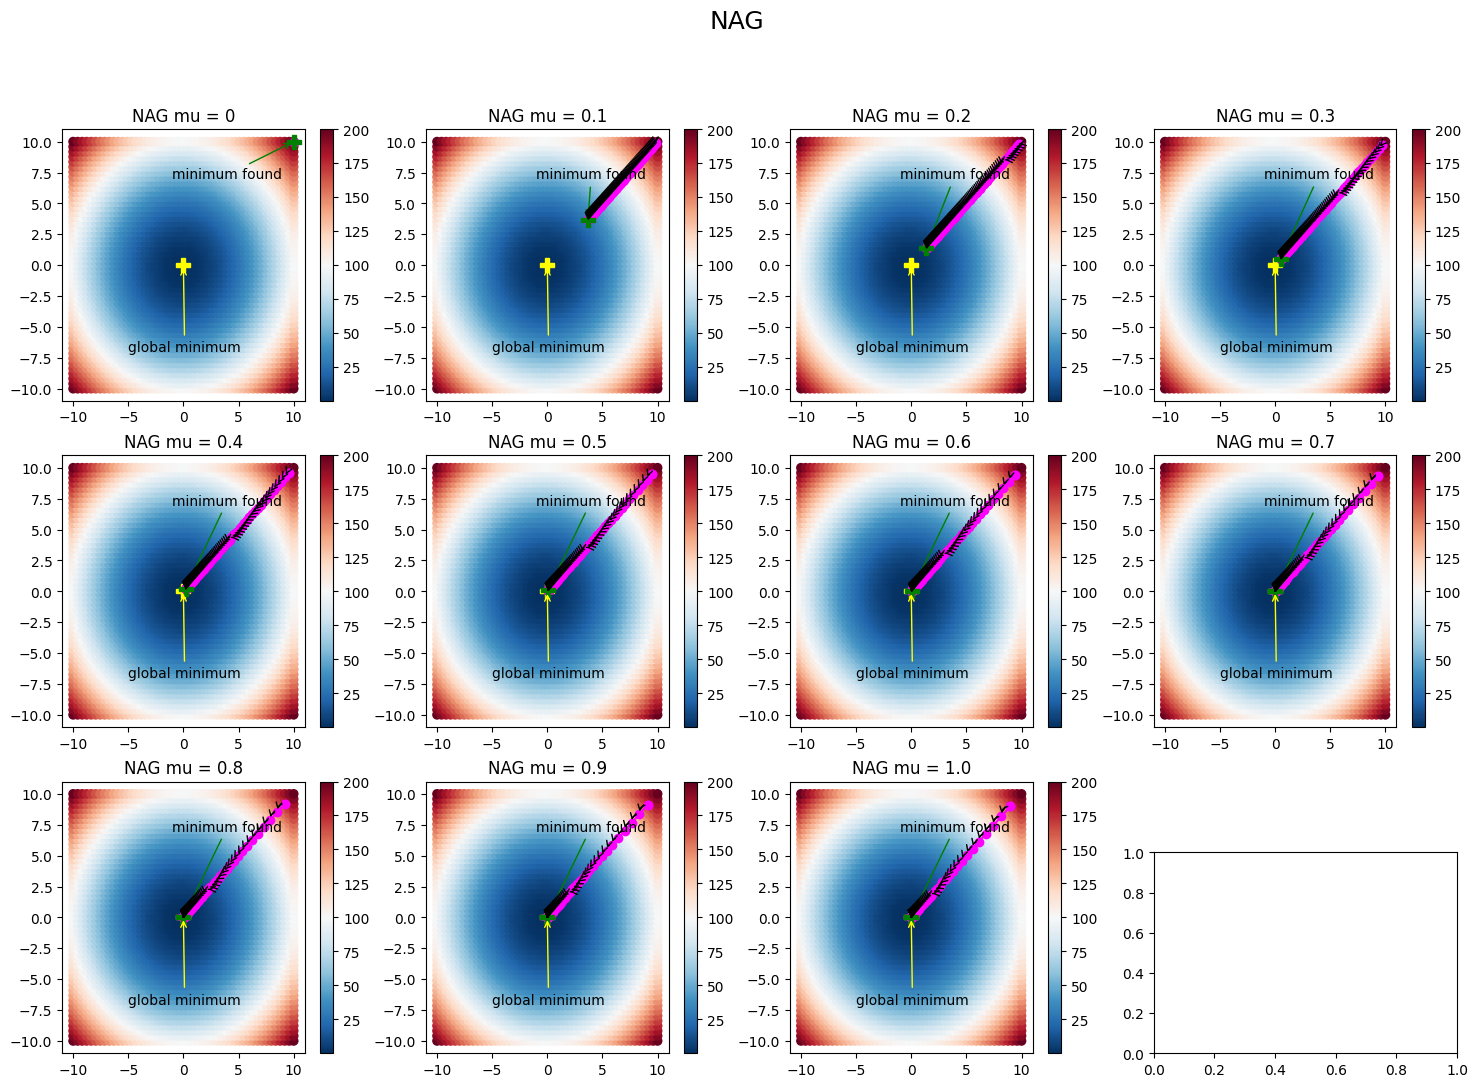

In [1]:
# Reference: https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
# A code that converges which is optimal by changing mu, one of the parameters of SGD with momentum, from 0 to 1 to 0.1 units.
# Includes convergent visualization.

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

# Make threshold a -ve value if you want to run exactly
# max_iterations.

# visualision_fw() function : generates 2500 points at equal intervals and calculates the function value at each point.
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
# Visualize points through color and text
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# function_plot() function : displays all points in different colors depending on the f(w) value of the point.
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()


# Running Gradient Descent with Different Hyper-parameters

# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
# The arrows on the graph allow you to easily track the last updated point
def visualize_learning(w_history):  
    
    # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]    


#Gradient Descent for Minimizing Mean Square Error

# Input argument is weight and a tuple (train_data, target)
def grad_mse(w,xy):
    (x,y) = xy
    (rows,cols) = x.shape
    
    # Compute the output
    o = np.sum(x*w,axis=1)
    diff = y-o
    diff = diff.reshape((rows,1))    
    diff = np.tile(diff, (1, cols))
    grad = diff*x
    grad = -np.sum(grad,axis=0)
    return grad

# Input argument is weight and a tuple (train_data, target)
def mse(w,xy):
    (x,y) = xy
    
    # Compute output
    # keep in mind that wer're using mse and not mse/m
    # because it would be relevant to the end result
    o = np.sum(x*w,axis=1)
    mse = np.sum((y-o)*(y-o))
    mse = mse/2
    return mse    



# Running Gradient Descent on OCR

# Load the digits dataset with two classes
digits,target = dt.load_digits(n_class=2,return_X_y=True)
fig,ax = plt.subplots(nrows=1, ncols=10,figsize=(12,4),subplot_kw=dict(xticks=[], yticks=[]))

# Plot some images of digits
for i in np.arange(10):
    ax[i].imshow(digits[i,:].reshape(8,8),cmap=plt.cm.gray)   
plt.show()

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=10)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))


# Function that calculates the history of the NAG
def nag(max_epochs, threshold, w_init, obj_func, grad_func, xy, mu=0.1,
        learning_rate=0.05, momentum=0.8):
    (x_train,y_train) = xy
    w = w_init
    w_history = w
    f_history = obj_func(w, xy)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while i < max_epochs and diff > threshold:
        # Calculate gradient with lookahead weights
        lookahead_w = w + momentum * delta_w * mu
        lookahead_gradient = grad_func(lookahead_w, xy)
        
        delta_w = -learning_rate * lookahead_gradient
        w += mu*delta_w
        
        # Store the history of w and f
        w_history = np.vstack((w_history, w))
        f_history = np.vstack((f_history, obj_func(w,xy)))
        
        # Update iteration number and diff between successive values
        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])
        
    return w_history, f_history


def visualize(w_history):
    # Make the function plot
    function_plot(pts, f_vals)
    
    # Plot the history
    plt.plot(w_history[:, 0], w_history[:, 1], marker='o', c='magenta')
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found', (w_history[-1, 0], w_history[-1, 1]), (-1, 7), 'green')
    
    iter = w_history.shape[0]
    for w, i in zip(w_history, range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                     xy=w, xycoords='data',
                     xytext=w_history[i+1, :], textcoords='data',
                     arrowprops=dict(arrowstyle='<-',
                                     connectionstyle='angle3'))

# Function that calculates different mu of NAG
def nag_mu(mu, i):
  plt.subplot(3,4,i+1)
  xy = (pts, f_vals)
  w_init = np.array([10.0, 10.0])  # Initial weights
  max_epochs = 100  # Maximum number of epochs
  threshold = 1e-8  # Threshold for convergence
  w_history, f_history = nag(max_epochs, threshold, w_init, f, grad, xy, mu,
                            learning_rate=0.05, momentum=0.8)
  visualize(w_history)
  plt.title('NAG mu = ' + str(mu))
  # plt.show()

# The part that outputs all records according to the parameters
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
mu = 0
for i in range(0,11):
  nag_mu(mu, i)

  mu += 0.1
  mu = round(mu, 1)

plt.suptitle('NAG',fontsize=18)
plt.show()
